In [11]:
import numpy as np
# pandas handles dataframes (exactly the same as tables in Matlab)
import pandas as pd
# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt
# stats models is a package that is going to perform the regression analysis
from statsmodels import api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
# os allows us to manipulate variables on out local machine, such as paths and environment variables
import os
# self explainatory, dates and times
from datetime import datetime, date
# a helper package to help us iterate over objects
import itertools
from sklearn.model_selection import train_test_split

# Loading and Transforming Data 

In [12]:
#Loading data
communitydata = pd.read_csv(r'C:\Users\Callum\Documents\cab420-assignment1a\CAB420Assignment1A\communities.csv')
print(communitydata.head())
#Removing whitespaces
communitydata.rename(columns=lambda x: x.strip(), inplace=True)
communitydata = communitydata.rename(columns=lambda x: x.strip())
#counting Questionmarks
questionmark_count = communitydata['PctPolicWhite'].value_counts()['?']
num_rows, num_cols = communitydata.shape
print("Number of ?:", questionmark_count, "\nTotal number of rows:", num_rows, "\nRows containing data:" ,
      num_rows - questionmark_count)

# Y = wine['ViolentCrimesPerPop']
# X_train,X_test, Y_train,  Y_test = train_test_split(X,Y,test_size=0.3, random_state=4)

    state   county   community   communityname string   fold    population   \
0        8        ?           ?          Lakewoodcity       1          0.19   
1       53        ?           ?           Tukwilacity       1          0.00   
2       24        ?           ?          Aberdeentown       1          0.00   
3       34        5       81440   Willingborotownship       1          0.04   
4       42       95        6096     Bethlehemtownship       1          0.01   

    householdsize    racepctblack    racePctWhite    racePctAsian   ...  \
0             0.33            0.02            0.90            0.12  ...   
1             0.16            0.12            0.74            0.45  ...   
2             0.42            0.49            0.56            0.17  ...   
3             0.77            1.00            0.08            0.12  ...   
4             0.55            0.02            0.95            0.09  ...   

    LandArea    PopDens    PctUsePubTrans    PolicCars    PolicOperBudg   

As can be seen there are only 319 rows containing actually data in PctPolicWhite and many other columns. Due to this, we have decided to remove these columns.

In [13]:
#Get all columns
column_names = communitydata.columns
#Remove columns with "?"
questionmark_count = 0

communitydata = communitydata.drop(columns=['fold', 'state', 'communityname string', 'community', 'county'])
column_names = communitydata.columns

print("Remaining columns: ",list(column_names))
for index, elem in enumerate(column_names):
    try:
        questionmark_count = communitydata[elem].value_counts()['?']
        #need to look at this, some with only 50 ?
        if(questionmark_count > 0):
            
            del communitydata[elem]
        
        questionmark_count = 0
    except:
        pass
        
column_names = communitydata.columns



Remaining columns:  ['population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargH

Model 1 RMSE = 0.13121799494491246
                                 OLS Regression Results                                 
Dep. Variable:     ViolentCrimesPerPop   R-squared (uncentered):                   0.860
Model:                             OLS   Adj. R-squared (uncentered):              0.848
Method:                  Least Squares   F-statistic:                              72.83
Date:                 Wed, 18 Mar 2020   Prob (F-statistic):                        0.00
Time:                         13:33:00   Log-Likelihood:                          823.53
No. Observations:                 1276   AIC:                                     -1449.
Df Residuals:                     1177   BIC:                                     -939.1
Df Model:                           99                                                  
Covariance Type:             nonrobust                                                  
                            coef    std err          t      P>|t|      [0.0

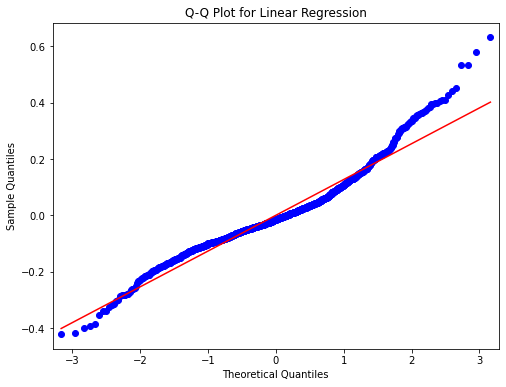

In [14]:
#Split data into train test validation
y = communitydata['ViolentCrimesPerPop']
X = communitydata.drop('ViolentCrimesPerPop', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, Y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
model = sm.OLS(y_train, X_train)
# fit the model without any regularisation
model_1_fit = model.fit()
pred = model_1_fit.predict(X_val)
print('Model 1 RMSE = {}'.format(
  np.sqrt(mean_squared_error(Y_val, model_1_fit.predict(X_val)))))
print(model_1_fit.summary())
print(model_1_fit.params)
fig, ax = plt.subplots(figsize=(8,6))
sm.qqplot(model_1_fit.resid, ax=ax, line='s')
plt.title('Q-Q Plot for Linear Regression')
plt.show()

[[ 1.         -0.04614841  0.23117774 ...  0.27035553  0.46635229
   0.36715738]
 [-0.04614841  1.         -0.06710914 ... -0.05150557 -0.09436752
  -0.0349226 ]
 [ 0.23117774 -0.06710914  1.         ...  0.14702299  0.26079264
   0.63126363]
 ...
 [ 0.27035553 -0.05150557  0.14702299 ...  1.          0.20664393
   0.15382885]
 [ 0.46635229 -0.09436752  0.26079264 ...  0.20664393  1.
   0.34862726]
 [ 0.36715738 -0.0349226   0.63126363 ...  0.15382885  0.34862726
   1.        ]]


<Figure size 432x288 with 0 Axes>

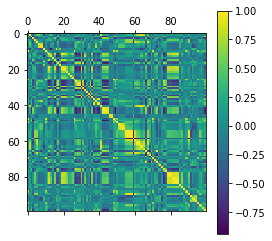

In [16]:
corr_coeffs = communitydata[column_names].corr()
plt.figure()
plt.matshow(corr_coeffs)
plt.colorbar()
print(np.array(corr_coeffs))